# <center>Ejercicios usando Numpy <center>

## 1.

Implemente la convolución unidimensional entre los siguientes polinomios:
P(x) = 2x^3+3x^2+6x+7 y h(x) = x+2

Tips:

• Para desplazar el polinomio h sobre el polinomio P puede usar la función shift
de la librería scipy.ndimage.interpolation

• Para reflejar el polinomio h puede utilizar la función flip

In [134]:
import numpy as np
from scipy.ndimage.interpolation import shift

p = np.array([2,3,6,7])
h = np.array([1,2])
h = np.flip(h, 0)

p= np.insert(p,0,0)
p= np.insert(p,p.shape,0)
p= np.insert(p,p.shape,0)
#print(p)

conv = np.zeros(1)

for i in range(5):
    h= np.insert(h,h.shape[0],0)
    #print(h)

for i in range(1,p.shape[0]-1):
    conv = np.append(conv,np.sum(h*p))
    h = shift(h,1)
    
conv = np.delete(conv,0,0)
print(conv)



[ 2.  7. 12. 19. 14.]


## 2.
Haga un sencillo filtrado (detección de bordes) a la imagen lenna.png utilizando el
kernel Sobel y la convolución en dos dimensiones.

Kernel Sobel horizontal: sobel_h = [[-1,-2,-1],[0,0,0],[1,2,1]]

Kernel Sobel vertical: sobel_v = [[-1,0,1],[-2,0,2],[-1,0,1]]

• Para poder trabajar con la imagen debe bajarla a escala de grises eliminando la
última componente de la matriz de la imagen.

• Para cargar la imagen puede utilizar la función pylab.imread('lenna.png’)

• Para mostrar una imagen puede utilizar la función pylab.imshow(arreglo_imagen,
cmap=pyl.cm.gray)

• Para habilitar un plot adicional para mostrar una imagen adicional puede utilizar la
función pylab.figure()

• Para no tener problemas al hacer la convolución entre la imagen y el kernel,
agregue filas y columnas de 1's en los límites de la imagen

• Para obtener la imagen con los bordes debe crear una matriz cuyos elementos
(pixeles) equivalen a la raíz cuadradra de la suma de los cuadrados de los valores
de los pixeles en las matrices resultantes luego de las convoluciones con los
kernels de Sobel

Text(0.5,1,'Filtro Sobel Horizontal')

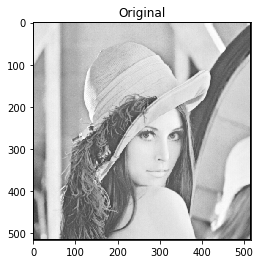

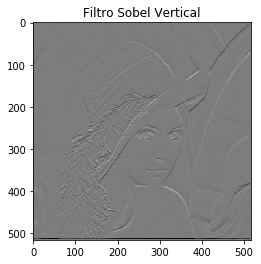

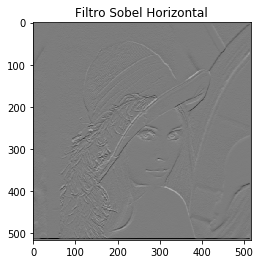

In [254]:
import numpy as np
import pylab

def padding(img,size):
    
    zerosH= np.zeros([size,img.shape[0]], dtype=np.uint8)
    img = np.concatenate((zerosH, img),axis=0)
    zerosV= np.zeros([img.shape[0],size], dtype=np.uint8)
    img = np.concatenate((zerosV, img),axis=1)
    
    zerosH= np.zeros([size,img.shape[0]], dtype=np.uint8)
    img = np.concatenate((img, zerosH),axis=0)
    zerosV= np.zeros([img.shape[0],size], dtype=np.uint8)
    img = np.concatenate((img, zerosV),axis=1)
    
    return(img)

def filtering(kernel, img):
    
    imgFilter = np.copy(img)
    #print(img[0:0+3,0:0+3])
    for i in range(img.shape[0]-2):
        for j in range(img.shape[0]-2):
            imgFilter[i,j] = np.sum(kernel*img[i:i+3,j:j+3])
            
    return(imgFilter)
            
        
    
    

kernelSobH =  np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
kernelSobV = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

img =  pylab.imread("lenna.png")
img = padding(img[:,:,0],2)
pylab.imshow(img, cmap=pylab.cm.gray)
pylab.title("Original")


soberH = filtering(kernelSobH,img)
soberV = filtering(kernelSobV,img)

pylab.figure()
pylab.imshow(soberV, cmap=pylab.cm.gray)
pylab.title("Filtro Sobel Vertical")
pylab.figure()
pylab.imshow(soberH, cmap=pylab.cm.gray)
pylab.title("Filtro Sobel Horizontal")





## 3.
En el siguiente enlace:

https://nptel.ac.in/courses/111107062/module3/lecture1/lecture1.pdf se describe
un algoritmo que sirve para calcular el valor propio (eigenvalue) dominante de una
matriz cuadrada de dimensión 3, utilice la librería numpy para implementar ese
algoritmo en Python. Utilizando su función encuentre el valor propio de la matriz:

D = [[1,-3,8],[2,-5,9],[3,-6,10]]

Puede verificar el resultado obtenido (el valor propio dominante) utilizando la función
numpy.linalg.eig(D)

In [3]:
import numpy as np
D = [[1,-3,8],[2,-5,9],[3,-6,10]]

def normalizar(vector):
    
    mayor = np.amax(vector)
    menor = np.amin(vector)
    if (abs(mayor) >= abs(menor)): mayorMagnitud = mayor
    else: mayorMagnitud = menor
    
    vector = vector * (1 / mayorMagnitud)
    return (mayor, vector)
 
def eigenDominantes(lista, iteraciones):
    matriz = np.array(lista)
    # Verificar que la matriz es cuadrada
    if (matriz.shape[0] != matriz.shape[1]): 
        return (None, None)

    tamagno = matriz.shape[0]
    eigenVector = np.ones((tamagno))
    
    for i in range(iteraciones):
        producto = np.dot(matriz, eigenVector)
        factor, eigenVector = normalizar(producto)
    return (factor, eigenVector)


def eigenDominantesLibreria(eigenValores, eigenVectores):
    
    indiceMayor = np.absolute(eigenValores.argmax())
    eigenValorDominante = eigenValores[indiceMayor]
    eigenVector = eigenVectores[:, indiceMayor]
    _, eigenVectorDominante = normalizar(eigenVector)
    return (eigenValorDominante, eigenVectorDominante)
    
    
iteraciones = 15
eigenValor, eigenVector = eigenDominantes(D, iteraciones)
print('Iteraciones: ', iteraciones)
print('Eigenvalor dominante con funcion propia: ', eigenValor)
print('Eigenvector dominante con funcion propia: ', eigenVector)

# Comprobación con librería numpy
eigenValores, eigenVectores = np.linalg.eig(np.array(D))
eigenValor, eigenVector = eigenDominantesLibreria(eigenValores, eigenVectores)
print('Eigenvalor dominante con libreria: ', eigenValor)
print('Eigenvector dominante con libreria: ', eigenVector)


('Iteraciones: ', 15)
('Eigenvalor dominante con funcion propia: ', 7.3533829156849544)
('Eigenvector dominante con funcion propia: ', array([ 0.85016757,  0.86618663,  1.        ]))
('Eigenvalor dominante con libreria: ', (7.3533829156847945+0j))
('Eigenvector dominante con libreria: ', array([ 0.85016757+0.j,  0.86618663+0.j,  1.00000000+0.j]))
